# Homework 2 - Machine Learning Pipeline

## by Lilian Huang

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pipeline_library as pl
%matplotlib inline

## Read Data

We start by reading in the dataset and taking a glance at the first few rows.

In [2]:
df = pl.read_data('credit-data.csv')

In [3]:
df.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,98976,0,1.000000,55,60601,0,505.000000,0.0,2,0,0,0,0.0
1,98991,0,0.547745,71,60601,0,0.459565,15666.0,7,0,2,0,0.0
2,99012,0,0.044280,51,60601,0,0.014520,4200.0,5,0,0,0,0.0
3,99023,0,0.914249,55,60601,4,0.794875,9052.0,12,0,3,0,0.0
4,99027,0,0.026599,45,60601,0,0.049966,10406.0,4,0,0,0,2.0


## Explore Data

We will now explore the dataset. We see that it has 41,016 rows, and 13 columns. Most of these variables are numeric.

We also see that there are missing values in the "MonthlyIncome" and "NumberOfDependents" columns, which must be dealt with later.

In [4]:
pl.info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41016 entries, 0 to 41015
Data columns (total 13 columns):
PersonID                                41016 non-null int64
SeriousDlqin2yrs                        41016 non-null int64
RevolvingUtilizationOfUnsecuredLines    41016 non-null float64
age                                     41016 non-null int64
zipcode                                 41016 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    41016 non-null int64
DebtRatio                               41016 non-null float64
MonthlyIncome                           33042 non-null float64
NumberOfOpenCreditLinesAndLoans         41016 non-null int64
NumberOfTimes90DaysLate                 41016 non-null int64
NumberRealEstateLoansOrLines            41016 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    41016 non-null int64
NumberOfDependents                      39979 non-null float64
dtypes: float64(4), int64(9)
memory usage: 4.1 MB


We explicitly count the number of missing values in each column.

In [5]:
pl.null_count(df)

PersonID                                   0
SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
zipcode                                    0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                           7974
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      1037
dtype: int64

We then generate summary statistics for each variable, specifically: count, median, standard deviation, minimum value, percentiles, and maximum value.

In [6]:
pl.summ_stats(df)

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,41016.000000,41016.000000,41016.00000,41016.000000,41016.000000,41016.000000,41016.000000,3.304200e+04,41016.000000,41016.000000,41016.000000,41016.000000,39979.000000
mean,115800.154598,0.161400,6.37587,51.683489,60623.824166,0.589233,331.458137,6.578996e+03,8.403477,0.419592,1.008801,0.371587,0.773231
std,28112.723511,0.367904,221.61895,14.746880,11.984357,5.205628,1296.109695,1.344683e+04,5.207324,5.190382,1.153826,5.169641,1.121269
min,22.000000,0.000000,0.00000,21.000000,60601.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106539.750000,0.000000,0.03431,41.000000,60618.000000,0.000000,0.176375,3.333000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,119901.500000,0.000000,0.18973,51.000000,60625.000000,0.000000,0.369736,5.250000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,134698.250000,0.000000,0.66716,62.000000,60629.000000,0.000000,0.866471,8.055750e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,149999.000000,1.000000,22000.00000,109.000000,60644.000000,98.000000,106885.000000,1.794060e+06,56.000000,98.000000,32.000000,98.000000,13.000000


We see that only 16% of the observations in the dataset experienced 90 days past due delinquency or worse; 84% did not.

In [7]:
pl.make_percent_table(df, "SeriousDlqin2yrs")

,SeriousDlqin2yrs,count,percent
0,0,34396,83.859957
1,1,6620,16.140043


We then use histograms to visualize the distribution of each variable. We see that age is the only variable that comes even roughly close to a normal distribution.

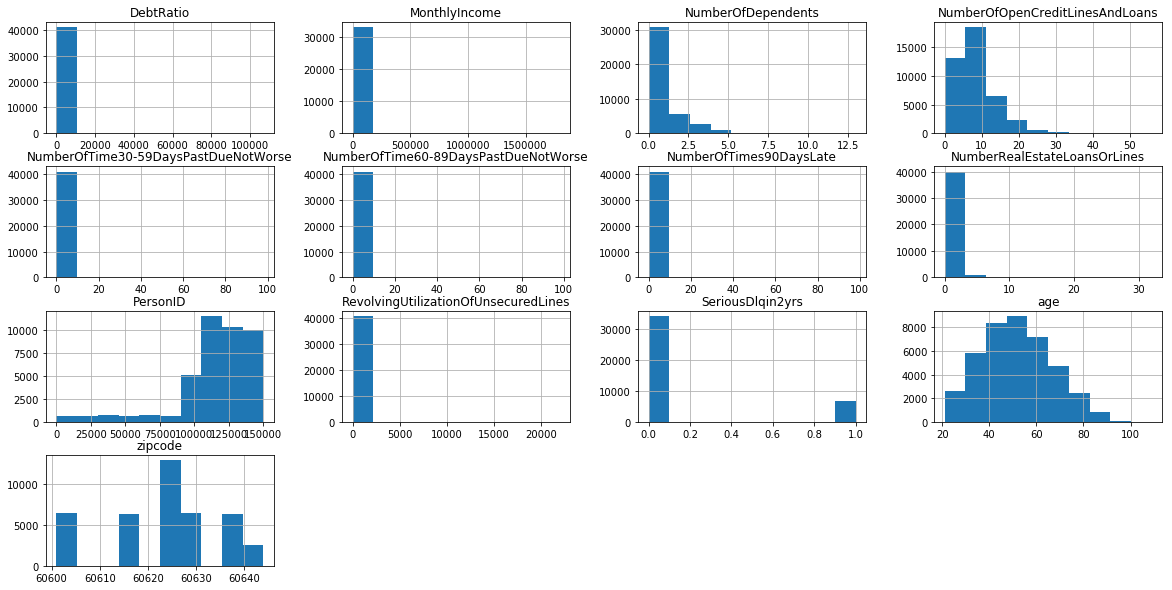

In [8]:
pl.make_hist(df, 20, 10)

We also make a heatmap to visualize the correlations between each possible pair of variables.

We see that there are small positive correlations between the variable of interest (SeriousDlqin2yrs, which indicates whether the person experienced 90 days past due delinquency or worse) and:
- the number of times the borrower has been 30-59 days past due but no worse in the last 2 years
- the number of times the borrower has been 60-89 days past due but no worse in the last 2 years
- the number of times the borrower has been 90 days or more past due

We also see a small negative correlation between SeriousDlqin2yrs and age, meaning that older borrowers are less likely to experience 90 days past due delinquency or worse.

We also observe strong correlation between the variables measuring the number of times the borrower is 30-59 days past due, 60-89 days past due, and 90 days or more past due. This tells us nothing new, as these variables are all constructed from the same metric. This suggests that we should not include all of these variables, in order to reduce multicollinearity.

The heatmap also shows a strong negative correlation between SeriousDlqin2yrs and PersonID, but since PersonID is a unique identifier for each observation, this does not help our classification and should be excluded from the model.

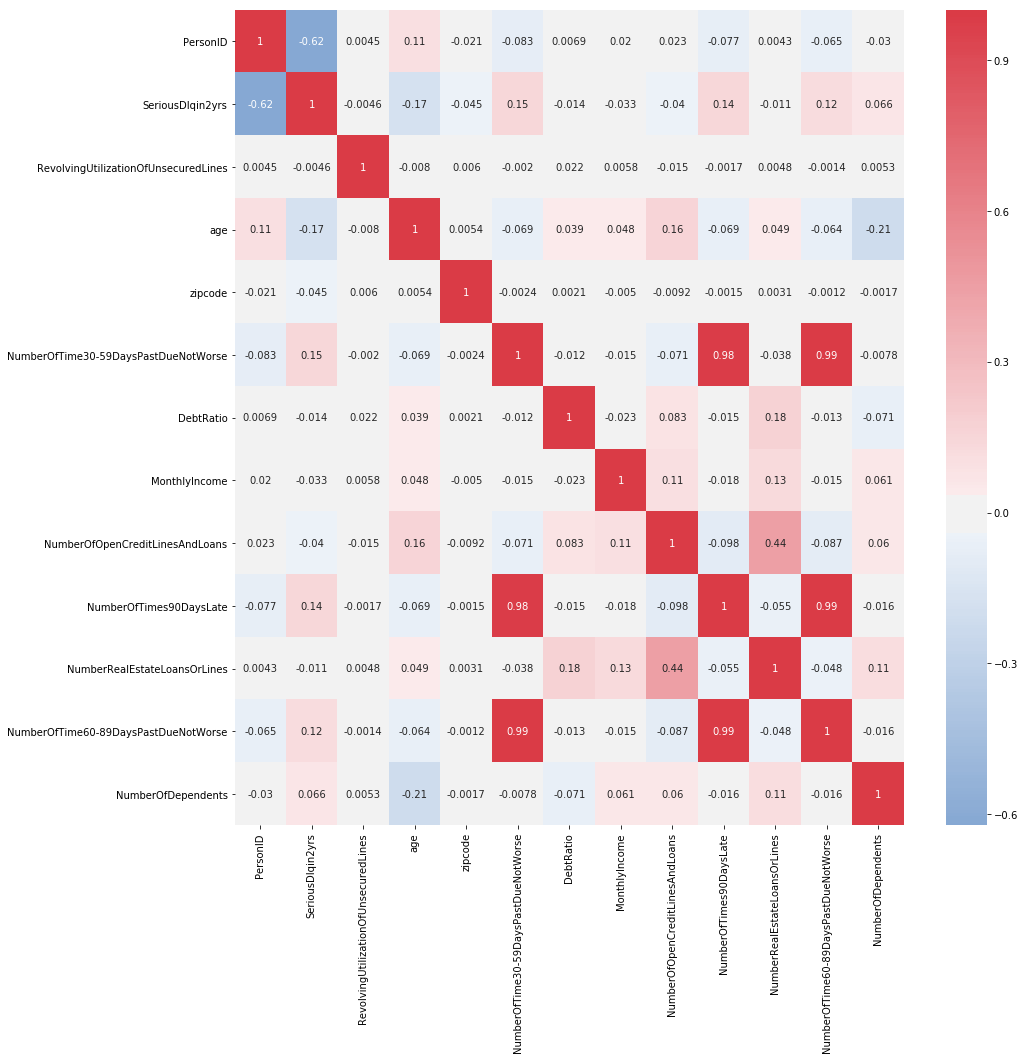

In [9]:
pl.corr_heatmap(df, 15, 15)

We now turn our attention to finding outliers in each variable. We do so by creating a boxplot for each variable.

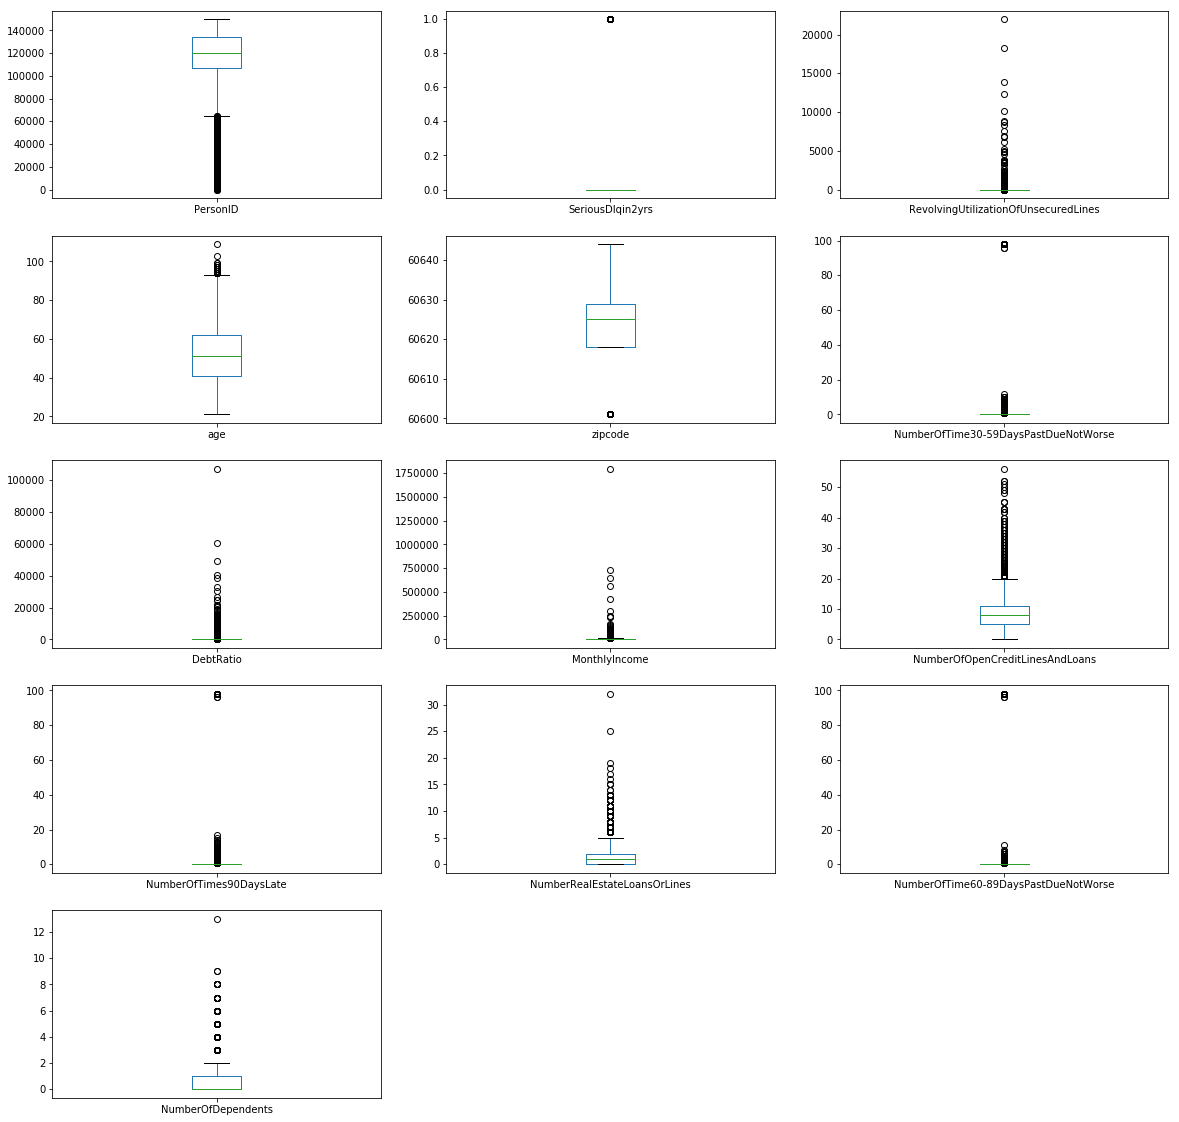

In [10]:
pl.make_box(df, 20, 20)

Given the presence of outliers, it seems like it would be best to make currently continuous variables such as RevolvingUtilizationOfUnsecuredLines, Age, MonthlyIncome, and NumberOfDependents into categorical variables. We will deal with this later.

In a dataset where there is a temporal element to the data, we should examine trends over time, but there are no date-specific variables in this dataset, so we will omit that step of the process.

Before diving into actual machine learning modeling, we can explore how the positive and negative classes (i.e. people for whom SeriousDlqin2yrs is 1, and people for whom SeriousDlqin2yrs is 0) differ, simply by looking at how the distributions of the other variables differ between these classes.

One way to do this is to create cross-tabs, but histograms are more compact and easier to parse.

The following layered histograms show that:
- people who experience serious delinquency seem to be generally younger than people who do not
- people who experience serious delinquency seem to generally have a greater number of dependents than people who do not

This is roughly corroborated by the general patterns shown in the earlier correlation matrix. These possible relationships can be used to guide our choice of features to include in the machine learning model.

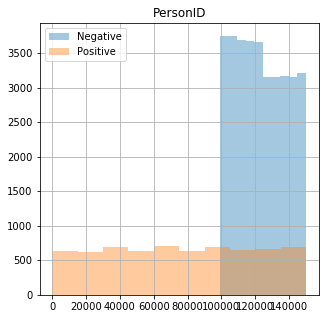

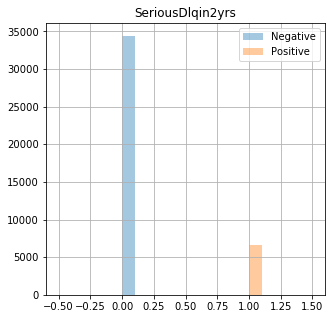

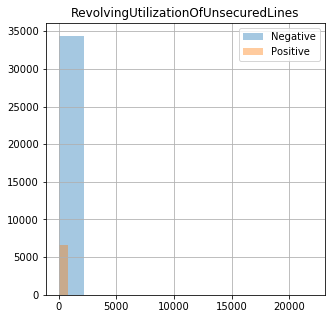

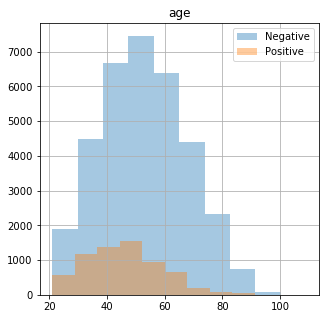

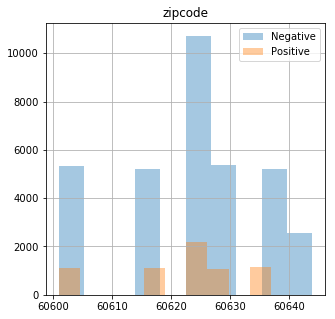

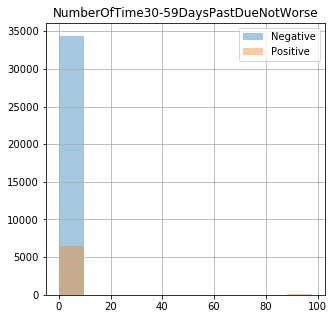

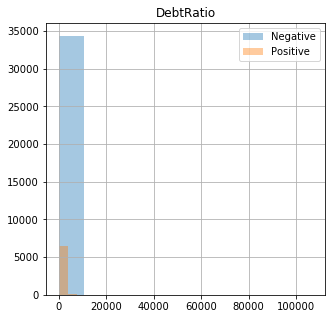

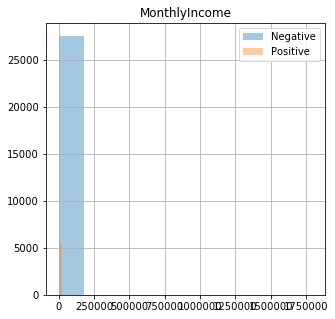

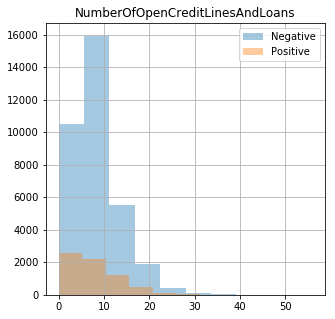

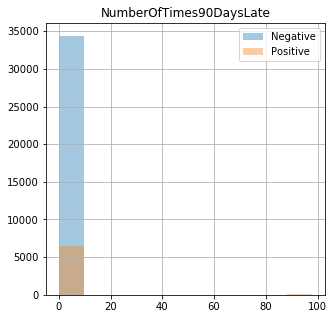

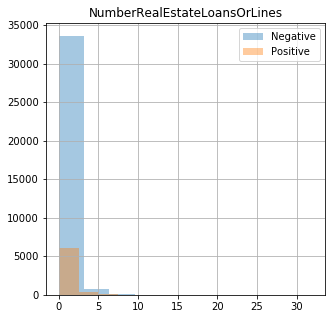

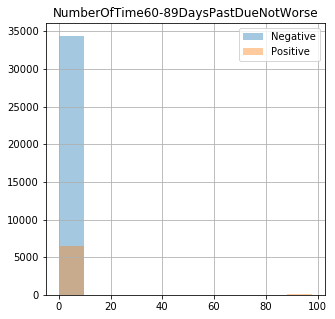

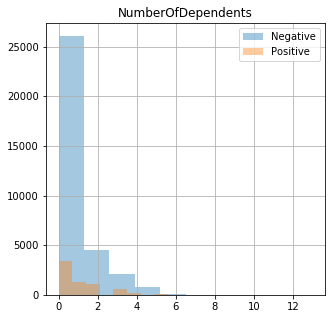

In [11]:
pl.crosshist(df, 'SeriousDlqin2yrs')

## Pre-Process Data

We now have to deal with the issue of missing values, as mentioned earlier.

We will fill in missing values with the median value of that variable. We could use the median or the mean, but we choose the median in this case because:
- There are sizeable outliers in this dataset, as found earlier, and the median is less sensitive to outliers
- According to the provided data dictionary, many of the variables in this dataset are integers (including NumberOfDependents, which has missing values), and using the median value will let us preserve that.

In [12]:
df = pl.impute_median(df)

In [13]:
df.isnull().sum()

PersonID                                0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
zipcode                                 0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

We see that all columns no longer have any missing values.

## Generate Features

We now generate features from the existing variables, to be used in our machine learning model.

As mentioned earlier, we convert the continuous variables RevolvingUtilizationOfUnsecuredLines, Age, MonthlyIncome, and NumberOfDependents into categorical variables, because these had sizeable outliers.

In [14]:
df, bins = pl.discretize(df, "age")
bins

array([  20.912,   38.6  ,   56.2  ,   73.8  ,   91.4  ,  109.   ])

In [15]:
df, bins = pl.discretize(df, "NumberOfDependents")
bins

array([ -0.013,   2.6  ,   5.2  ,   7.8  ,  10.4  ,  13.   ])

In [16]:
df[["age", "age_discrete"]].tail(n=50)

,age,age_discrete
40966,60,2
40967,56,1
40968,37,0
40969,47,1
40970,71,2
40971,62,2
40972,50,1
40973,24,0
40974,72,2
40975,63,2


For monthly income, we have to set the categories based on percentiles, because the highest value (1794060.0) is so high that using equal-width categories (as we do for the other variables) would distort the limits of the categories.

In [17]:
income_bins = pl.get_thresholds(df, "MonthlyIncome")
income_bins

[0.0, 3330.0, 5216.0, 5300.0, 8094.0, 1794060.0]

In [18]:
df, bins = pl.discretize(df, "MonthlyIncome", bins=income_bins)

In [19]:
df[["MonthlyIncome", "MonthlyIncome_discrete"]].head(n=50)

,MonthlyIncome,MonthlyIncome_discrete
0,0.0,0
1,15666.0,4
2,4200.0,1
3,9052.0,4
4,10406.0,4
5,13500.0,4
6,3583.0,1
7,2700.0,0
8,3400.0,1
9,5050.0,1


The same is the case for RevolvingUtilizationOfUnsecuredLines.

In [20]:
util_bins = pl.get_thresholds(df, "RevolvingUtilizationOfUnsecuredLines")
util_bins

[0.0, 0.022024945, 0.09889360300000001, 0.334872409, 0.810027139, 22000.0]

In [21]:
df, bins = pl.discretize(df, "RevolvingUtilizationOfUnsecuredLines", bins=util_bins)

In [22]:
df[["RevolvingUtilizationOfUnsecuredLines", "RevolvingUtilizationOfUnsecuredLines_discrete"]].head(n=50)

,RevolvingUtilizationOfUnsecuredLines,RevolvingUtilizationOfUnsecuredLines_discrete
0,1.000000,4
1,0.547745,3
2,0.044280,1
3,0.914249,4
4,0.026599,1
5,0.142231,2
6,0.047601,1
7,0.022141,1
8,0.241805,2
9,0.036181,1


We also create binary/dummy variables from the different categories of the Zipcode variable.

To do so, we first have to convert it to a categorical variable.

In [23]:
df["zipcode"] = df["zipcode"].astype('category')
df.dtypes

PersonID                                            int64
SeriousDlqin2yrs                                    int64
RevolvingUtilizationOfUnsecuredLines              float64
age                                                 int64
zipcode                                          category
NumberOfTime30-59DaysPastDueNotWorse                int64
DebtRatio                                         float64
MonthlyIncome                                     float64
NumberOfOpenCreditLinesAndLoans                     int64
NumberOfTimes90DaysLate                             int64
NumberRealEstateLoansOrLines                        int64
NumberOfTime60-89DaysPastDueNotWorse                int64
NumberOfDependents                                float64
age_discrete                                        int64
NumberOfDependents_discrete                         int64
MonthlyIncome_discrete                              int64
RevolvingUtilizationOfUnsecuredLines_discrete       int64
dtype: object

In [24]:
df = pl.make_dummies(df, "zipcode")
df.tail(n=50)

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,...,NumberOfDependents,age_discrete,NumberOfDependents_discrete,MonthlyIncome_discrete,RevolvingUtilizationOfUnsecuredLines_discrete,zipcode_60618,zipcode_60625,zipcode_60629,zipcode_60637,zipcode_60644
40966,123244,0,0.108956,60,60644,0,0.469555,3300.0,7,0,...,0.0,2,0,0,2,0,0,0,0,1
40967,123247,0,1.000000,56,60644,0,0.085699,7397.0,3,0,...,0.0,1,0,3,4,0,0,0,0,1
40968,123252,0,0.011217,37,60644,0,0.291674,5800.0,4,0,...,0.0,0,0,3,0,0,0,0,0,1
40969,123258,0,0.229676,47,60644,3,4645.000000,5250.0,20,0,...,2.0,1,0,2,2,0,0,0,0,1
40970,123264,0,0.054102,71,60644,0,0.265173,10000.0,6,0,...,1.0,2,0,4,1,0,0,0,0,1
40971,123284,0,0.086294,62,60644,0,0.218689,6163.0,10,0,...,0.0,2,0,3,1,0,0,0,0,1
40972,123310,0,0.739478,50,60644,0,640.000000,5250.0,8,0,...,0.0,1,0,2,3,0,0,0,0,1
40973,123311,0,0.000000,24,60644,0,0.000000,864.0,1,0,...,0.0,0,0,0,0,0,0,0,0,1
40974,123346,0,0.000000,72,60644,0,5.000000,5250.0,3,0,...,0.0,2,0,2,0,0,0,0,0,1
40975,123354,0,0.994429,63,60644,4,0.254854,8137.0,6,6,...,0.0,2,0,4,4,0,0,0,0,1


## Build Classifier

We will now construct a logistic regression classifier to predict the outcome for an observation: whether the person will experience 90 days past due delinquency (or worse), or not.

Typically, we ought to split the data into training and testing datasets, but since the assignment specifies not to worry about cross-validation, we will not do so here.

Our outcome variable is 'SeriousDlqin2yrs'.

The features we will use are: 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'DebtRatio', 'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines', 'RevolvingUtilizationOfUnsecuredLines_discrete', 'age_discrete', 'MonthlyIncome_discrete', 'NumberOfDependents_discrete', 'zipcode_60618', 'zipcode_60625', 'zipcode_60629', 'zipcode_60637', 'zipcode_60644'.

In [25]:
y_var = 'SeriousDlqin2yrs'

In [26]:
x_vars = ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'DebtRatio', 
          'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines', 
          'RevolvingUtilizationOfUnsecuredLines_discrete', 'age_discrete', 'MonthlyIncome_discrete', 
          'NumberOfDependents_discrete', 'zipcode_60618', 'zipcode_60625', 'zipcode_60629', 'zipcode_60637', 
          'zipcode_60644']

In [27]:
y, y_pred = pl.build_log(df, y_var, x_vars)

## Evaluate Classifier

We now have to evaluate the performance of our classifier, i.e. how our classifier did at classifying the observations.

One metric we can use is accuracy, which is the fraction of observations that are predicted correctly (i.e. true positives and true negatives).

We see that our model has an accuracy of 85%.

In [28]:
pl.get_accuracy(y, y_pred)

0.8498147064560172

However, as we saw earlier, 84% of the observations in the dataset had an outcome label of 0, so even if our model simply assigned all observations a label of 0, we would have an accuracy score of 84%. Hence, this model is not really much more accurate than that baseline model.

We can get a more detailed breakdown of our model's performance using a confusion matrix, which shows the exact number of (from top left to bottom right): true negatives, false positives, false negatives, and true positives.

We see that there is quite a large number of false negatives (observations that actually have a true label of 1 but were labeled as 0 by the model). Depending which metric we care about, and how important it is for us to avoid false negatives, this may or may not be a problem.

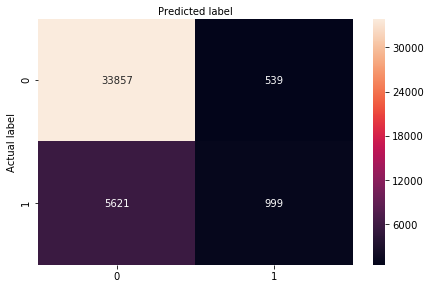

In [29]:
pl.conf_matrix(y, y_pred)